# SRTP Measurements in 5_2 ~ 5_3

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import SRTP_Deep_RNN_5_3_Utils as srtp

c:\program files\python36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
data_dict = {}
filenum = 19

In [3]:
data_dict['data1'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_JJL_5_2_0.txt"
                               ,row_start = 0,row_end = 18000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data2'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_JJL_5_2_0.txt"
                               ,row_start = 22000,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data3'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_WTX_5_2_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data4'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_WSP_5_3_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data5'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_CFW_5_3_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data6'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_XXS_5_3_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data7'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_WZH_5_3_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

data_dict['data8'] = srtp.read_data("SRTP_Measurement_5_2_3\\train_LWJ_5_3_0.txt"
                               ,row_start =0,row_end = 50000,column_start = 0, column_end = 8,print_shape = True)

(18000, 8)
(6634, 8)
(29227, 8)
(28199, 8)
(31133, 8)
(26655, 8)
(28300, 8)
(27090, 8)


In [4]:
data_dict['data9'] = srtp.read_data("SRTP_Mea_2_2\\train_HYC_2_7_0.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 8,print_shape = True)

data_dict['data10'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_1.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data11'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_2.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data12'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_3.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data13'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_4.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data14'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_5.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data15'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_6.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['test1'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_7.txt"
                               ,row_start = 0,row_end = 4000,column_start = 0, column_end = 7,print_shape = True)

data_dict['data16'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_8.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data17'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_9.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data18'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_10.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

data_dict['data19'] = srtp.read_data("SRTP_Mea_2_2\\train_2_7_11.txt"
                               ,row_start = 0,row_end = None,column_start = 0, column_end = 7,print_shape = True)

(14975, 8)
(35283, 7)
(25715, 7)
(28840, 7)
(23802, 7)
(23159, 7)
(25307, 7)
(4000, 7)
(31865, 7)
(24954, 7)
(26397, 7)
(31145, 7)


## Data Preprocessing

In [5]:
num_periods = 30
f_horizon = 5

In [6]:
mean1 = -80 
std1 = 15 
meanw1 = 0
stdw1 = 75

mean2 = -110
std2 = 15
meanw2 = 0
stdw2 = 90

meany = 35
stdy = 15

In [7]:
for i in range(1,filenum + 1):
    data_dict['normalizeddata' + str(i)] = data_dict['data'+str(i)].copy()
    temp1 = data_dict['data' + str(i)][f_horizon:,0]
    temp2 = data_dict['data' + str(i)][f_horizon:,2]
    data_dict['truey' + str(i)] = (temp1 - temp2).reshape(-1,1)
    data_dict['normalizeddata' + str(i)][:,0] = (data_dict['data' + str(i)][:,0] - mean1) / std1
    data_dict['normalizeddata' + str(i)][:,1] = (data_dict['data' + str(i)][:,1] - meanw1) / stdw1
    data_dict['normalizeddata' + str(i)][:,2] = (data_dict['data' + str(i)][:,2] - mean2) / std2
    data_dict['normalizeddata' + str(i)][:,3] = (data_dict['data' + str(i)][:,3] - meanw2) / stdw2
    data_dict['normalizeddata' + str(i)][:,4] = data_dict['data' + str(i)][:,4] / 3
    data_dict['normalizeddata' + str(i)][:,5] = data_dict['data' + str(i)][:,5] / 3
    data_dict['normalizeddata' + str(i)][:,6] = data_dict['data' + str(i)][:,6] / 3

In [8]:
for i in range(1,filenum + 1):
    data_dict['normalizeddata' + str(i)] = data_dict['normalizeddata' + str(i)][:-f_horizon,:]
    data_dict['truey' + str(i)] = (data_dict['truey' + str(i)] - meany)/stdy

In [9]:
validation_length = 4000;
seperate_test_set = [6,8,13,16];
test_index = 1;
train_index = 1;
breakpointset = [None for i in range(filenum)]
#breakpointset = [9775,1175,21640,20085,6428,None,15672,None,7388,15838,7947,16380,None,17840,15358,None,17390,8458,16442]
breakpointset = [7474,1348,11941,19839,11980,None,12721,None,7444,3029,6200,5600,None,6904,3900,None,6264,10586,10476]
for i in range(1,filenum + 1):
    if i in seperate_test_set:
        breakpoint = None;
    elif breakpointset[i-1] is None:
        breakpoint = np.random.randint(1100,data_dict['data'+str(i)].shape[0]-1200-validation_length);
        print(breakpoint)
    else:
        breakpoint = breakpointset[i-1]
        print(breakpoint)
    if breakpoint is None:
        data_dict['final_testx' + str(test_index)] = data_dict['normalizeddata' + str(i)].copy()
        data_dict['final_testy' + str(test_index)] = data_dict['truey' + str(i)].copy()
        test_index += 1
    else:
        data_dict['testx' + str(train_index)] = data_dict['normalizeddata' + str(i)][breakpoint:breakpoint+validation_length,:].copy()
        data_dict['testy' + str(train_index)] = data_dict['truey' + str(i)][breakpoint:breakpoint+validation_length,:].copy()
        data_dict['datax' + str(2*train_index - 1)] = data_dict['normalizeddata' + str(i)][:breakpoint,:].copy()
        data_dict['datay' + str(2*train_index - 1)] = data_dict['truey' + str(i)][:breakpoint,:].copy()
        data_dict['datax' + str(2*train_index)] = data_dict['normalizeddata'+str(i)][breakpoint + validation_length:,:].copy()
        data_dict['datay' + str(2*train_index)] = data_dict['truey' + str(i)][breakpoint+validation_length:,:].copy()
        train_index += 1
train_filenum  = train_index - 1
test_filenum = test_index - 1

7474
1348
11941
19839
11980
12721
7444
3029
6200
5600
6904
3900
6264
10586
10476


In [10]:
train_filenum

15

In [11]:
test_filenum

4

## Training With Tensorflow Using the new Model

'new_5_3_2018_Multipleguys_1_beta_0.00001_ration_1_2'
'new_5_3_2018_Multipleguys_1_beta_0.00001_ration_0_2'

In [28]:
import winsound

In [29]:
params_list = srtp.train_model(data_dict,is_new = True,ckptname = 'new_5_3_2018_Multipleguys_1_beta_0.00001_ration_0_3',
                          learning_rate = 0.01,beta = 0.001,epochs = 1,
                          ration = 0.4,cluster_num = 128,filenum = train_filenum,saver_name = None)

In [12]:
params_list = srtp.train_model(data_dict,is_new = False,ckptname = 'new_5_3_2018_Multipleguys_1_beta_0.00001_ration_0_2',
                          learning_rate = 0.000003,beta = 0,epochs = 1,
                          ration = 0,cluster_num = 128,filenum = train_filenum,saver_name = None,num_periods = 100)
#params_list = srtp.train_model(data_dict,is_new = False,ckptname = 'new_5_3_2018_Multipleguys_1_beta_0.00001_ration_1_2',
#                         learning_rate = 0.000003,beta = 0.000001,epochs = 10000,
#                         ration = 1,cluster_num = 64,filenum = train_filenum,saver_name = None,num_periods = 300)
winsound.Beep(600,1000)

Instructions for updating:
Use the retry module or similar alternatives.
INFO:tensorflow:Restoring parameters from ckptset\new_5_3_2018_Multipleguys_1_beta_0.00001_ration_0_2
0 	MSE: 0.033980581909418106


NameError: name 'winsound' is not defined

## Verify in plain Python along with the adaptive algorithms

### Total Verification on Training Set

In [36]:
srtp.total_verify(params_list,data_dict,train_filenum,
                  setting = 'data',start = 1000,end = 50000,
                  Q_angle = 0.004,Q_omega = 0.04,R = 1,alpha = 0.0001);

On Training set
0.030769493571398354
0.014564863805126357


In [17]:
0.031563996335837306*225

7.101899175563394

### Total Verification on validation Set

In [15]:
srtp.total_verify(params_list,data_dict,train_filenum,
                  setting = 'test',start = 1000,end = 50000,
                  Q_angle = 0.004,Q_omega = 0.04,R = 0.00001,alpha = 0.0001);

On Test set:
0.03774383367106006
0.024071128129880166


In [18]:
0.03774383367106006*225

8.492362575988514

### Total Verification on seperate test Set

In [16]:
srtp.total_verify(params_list,data_dict,test_filenum,
                  setting = 'final_test',start = 1000,end = 50000,
                  Q_angle = 0.004,Q_omega = 0.04,R = 0.00001,alpha = 0.0001);

0.041018623451106094
0.020475113728851566


In [19]:
0.041018623451106094*225

9.229190276498871

RNN mse: 8.296068170678305
RNN normalized mse 0.03687141409190357
Fourth order 0.01472598567672228


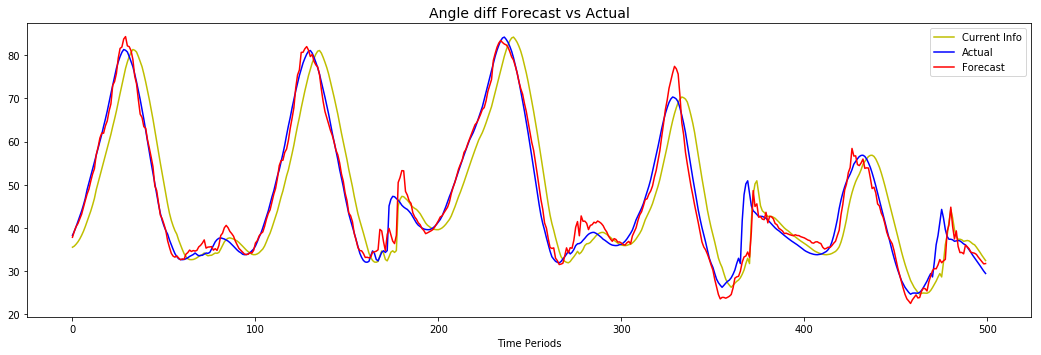

In [13]:
#setting = 'test'
#index = 10

setting = 'final_test'
index = 2

start = 17000
end = start + 500


testx = data_dict[setting + 'x' + str(index)][:,:].copy()
testy = data_dict[setting + 'y' + str(index)][:,:]
srtp.verify_divid_and_join(testx,testy,start,end,
                           params_list,1,printout = True,
                           Q_angle = 0.004,Q_omega = 0.04,
                           R = 0.00001,alpha = 0.00008);

In [83]:
data_dict['datax3'].shape

(1175, 8)

In [82]:
data_dict['datay3'].shape

(1175, 1)